# Using Multispectral Data with Scikit-Learn

This notebook gives a quick approach to using multispectral data in scikit learn

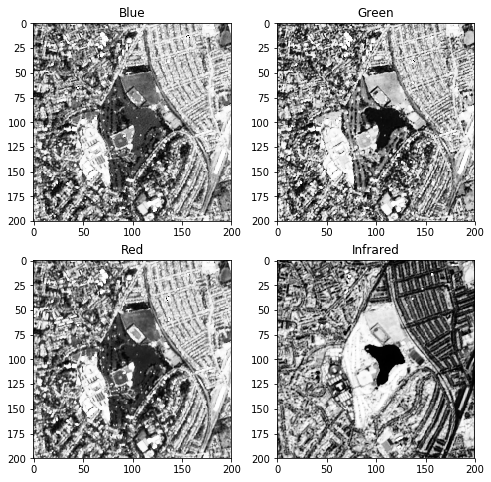

Image shape = 200 x 200 x 4


In [1]:
import numpy as np
from funcs import *
from sklearn import cluster,preprocessing
import matplotlib.pyplot as plt
# read in a sentinel 2 file
im = np.load('data/S2_London.npy')[700:900,300:500]

f = plt.figure(figsize=(8,8))

f.add_subplot(221)
plt.imshow(image_histogram_equalization(im[:,:,0]),'binary_r')
plt.title('Blue')

f.add_subplot(222)
plt.imshow(image_histogram_equalization(im[:,:,1]),'binary_r')
plt.title('Green')

f.add_subplot(223)
plt.imshow(image_histogram_equalization(im[:,:,2]),'binary_r')
plt.title('Red')

f.add_subplot(224)
plt.imshow(image_histogram_equalization(im[:,:,3]),'binary_r')
plt.title('Infrared')
plt.show()

print('Image shape = {s[0]} x {s[1]} x {s[2]}'.format(s=im.shape))

Using the imagery from part 1 as an example, we can see that this is an m x n x 4 (4-band) image. To use SKLearn, the data must be in a 2D array with each row an observation and each column a feature.

To do a pixel classification, we can simply reshape to a 2D array:

In [2]:
def multi_to_2d(arr):
    """ convert image array to list array"""
    s = arr.shape
    return np.ravel(arr,(0)).reshape((-1,s[2]))

im_2D = multi_to_2d(im)
im_2D.shape

(40000, 4)

Here's a quick example of using a clustering algorithm on all 4 colour channels:

In [3]:
# robust scale the dataset
im_2D = preprocessing.robust_scale(im_2D)

# construct a KMeans clustering object
clus = cluster.KMeans(n_clusters=6)

# perform clustering operation
## returns a list of cluster IDs
clusters = clus.fit_predict(im_2D)

# reshape the cluster vector to a
# 2D array for plotting

clusters = clusters.reshape(im.shape[:-1])
clusters

array([[2, 1, 1, ..., 2, 2, 0],
       [2, 1, 2, ..., 0, 5, 0],
       [2, 2, 1, ..., 0, 5, 5],
       ..., 
       [2, 0, 0, ..., 2, 1, 0],
       [1, 0, 0, ..., 2, 1, 0],
       [2, 2, 0, ..., 1, 2, 0]], dtype=int32)

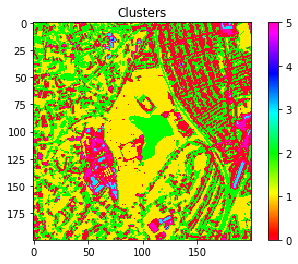

In [4]:
plt.imshow(clusters,'gist_rainbow')
plt.title('Clusters')
plt.colorbar()
plt.show()